# Stanford CME 241 (Winter 2024) - Assignment 6

**Due: Feb 19 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Solve all 3 questions.**
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/aleexxy/CME241-2024W/blob/main/assignment6.ipynb

*Group members (replace below names with people in your group):* 

-Handi Zhao(hdzhao@stanford.edu);

-Sylvia Sun(ys3835@stanford.edu);

-Zhengji Yang(yangzj@stanford.edu)

## Imports

## Question 1
We consider a special case of the Optimal Market-Making problem we
covered in class (Avellandea-Stoikov formulation) where the market-maker
has a cash amount of $W \in \mathbb{R}$ at time 0 and an inventory of
shares equal to $I \in \mathbb{Z}$ (note: this could be positive or
negative), but is not going to be market-making until time $T$. The
market maker's *Value Function* at time $t$ (with $0 \leq t \leq T$) is
given by the Expected Utility at time $T$ (conditional on the time $t$
and the OB Mid Price $S_t$ at time $t$):

$$V(t, S_t, W, I) = \mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$$

Assume the same process for the OB Mid Price as we had covered in class:

$$dS_t = \sigma \cdot dz_t$$

for some fixed $\sigma \in \mathbb{R}^+$. This means:

$$S_{t_2} \sim \mathcal{N}(S_{t_1}, \sigma^2 \cdot (t_2 - t_1))$$

for all $0 \leq t_1 \leq t_2$.

-   Under this process for $S_t$, evaluate the conditional expectation
    $\mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$ so you
    have a simple expression for $V(t, S_t, W, I)$.

-   Using the above expression for $V(t, S_t, W, I)$, calculate the
    Indifference Bid Price $Q^{(b)}(t, S_t, I)$ and the Indifference Ask
    Price $Q^{(a)}(t,S_t,I)$, which have the same definitions as we had
    covered in class, as follows:

    $$V(t,S_t,W - Q^{(b)}(t, S_t, I), I + 1) = V(t,S_t,W, I)$$
    $$V(t,S_t,W + Q^{(a)}(t, S_t, I), I - 1) = V(t,S_t,W, I)$$

Evaluating the conditional expectation $\mathbb{E} [-e^{-\gamma \cdot (W+I \cdot S_T)} | (t, S_t)]$, we have
\begin{align*}
    V(t, S_t, W, I) &= \mathbb{E} [-e^{-\gamma \cdot (W+I \cdot S_T)} | (t, S_t)] \\
    &= -e^{-\gamma W}\mathbb{E} [e^{-\gamma I \cdot S_T}] \\
    &= -e^{-\gamma W} \cdot (e^{-\gamma I \cdot S_t+\frac{\sigma^2(T-t)\gamma^2 I^2}{2}}) \\
    &= -e^{-\gamma (W+I\cdot S_t - \frac{\gamma I^2\sigma^2(T-t)}{2})}
\end{align*}
where $S_T \sim \mathcal{N} (S_t, \sigma^2 \cdot (T-t))$.


Then,
\begin{align*}
    V(t, S_t, W-Q^{(b)}(t, S_t, I), I+1) &= V(t, S_t, W, I) \\
    -e^{-\gamma (W-Q^{(b)}+(I+1)\cdot S_t - \frac{\gamma (I+1)^2\sigma^2(T-t)}{2})} &= -e^{-\gamma (W+I\cdot S_t - \frac{\gamma I^2\sigma^2(T-t)}{2})} \\
    W-Q^{(b)}+(I+1)\cdot S_t - \frac{\gamma (I+1)^2\sigma^2(T-t)}{2} &= W+I\cdot S_t - \frac{\gamma I^2\sigma^2(T-t)}{2} \\
    Q^{(b)} &= S_t - \frac{\gamma (I^2+2I+1-I^2)\sigma^2(T-t)}{2} \\
    &= S_t - (2I+1)\frac{\gamma \sigma^2(T-t)}{2} \\
\end{align*}
and
\begin{align*}
    V(t, S_t, W+Q^{(a)}(t, S_t, I), I-1) &= V(t, S_t, W, I) \\
    -e^{-\gamma (W+Q^{(a)}+(I-1)\cdot S_t - \frac{\gamma (I-1)^2\sigma^2(T-t)}{2})} &= -e^{-\gamma (W+I\cdot S_t - \frac{\gamma I^2\sigma^2(T-t)}{2})} \\
    W+Q^{(a)}+(I-1)\cdot S_t - \frac{\gamma (I-1)^2\sigma^2(T-t)}{2} &= W+I\cdot S_t - \frac{\gamma I^2\sigma^2(T-t)}{2} \\
    Q^{(a)} &= S_t - \frac{\gamma (I^2-I^2+2I-1)\sigma^2(T-t)}{2} \\
    &= S_t - (2I-1)\frac{\gamma \sigma^2(T-t)}{2}
\end{align*}

## Question 2
We'd like to test the performance of the Optimal Policy we derived in
class for the Optimal Market-Making problem. In particular, we want to
compare this Optimal Policy against a policy (call it "Naive Policy")
that is always symmetric around the OB Mid Price (rather than around the
Indifference Price) with a constant Bid-Ask Spread equal to the average
Bid-Ask Spread of the Optimal Policy.

We will do the comparison by generating a large number of simulation
traces. Each simulation trace consists of $\frac T {\Delta t}$ time
steps. The time step $\Delta t$ needs to be small enough so that the
probability of multiple orders transacting with the market-maker is
small but needs to be large enough so that there are indeed orders that
transact with the market-maker. In their paper, Avallaneda-Stoikov point
out that $\Delta t = 0.005$ worked well in their simulation experiments.

Here are the details on how to perform a time step in each simulation
trace for the Optimal Policy:

-   At each time $t$, we observe the *State*, and calculate the Optimal
    Action $(P_t^{(b)^*}, P_t^{(a)^*})$.

-   With probability
    $c \cdot e^{-k \cdot \delta_t^{(a)^*}} \cdot \Delta t$, the
    inventory variable is decremented by 1 and the trading PnL is
    increased by $P_t^{(a)^*}$.

-   With probability
    $c \cdot e^{-k \cdot \delta_t^{(b)^*}} \cdot \Delta t$, the
    inventory variable is incremented by 1 and the trading PnL is
    decreased by $P_t^{(b)^*}$.

-   The OB Mid Price is incremented or decremented randomly (each with
    probability 0.5) by $\sigma \cdot \sqrt{\Delta t}$.

-   These updates to the inventory variable, to the trading PnL and to
    the OB Mid Price give us the *State* for the next time
    $t + \Delta t$.

We run a large number (say 10,000) such simulation traces. We calculate
the average Bid-Ask Spread across all time steps across all simulation
traces. Then we set the Bid-Ask Spread for the "naive policy" to be this
average Bid-Ask Spread (constant Bid-Ask Spread). Repeat the same large
number of simulations for the "naive policy".

Track the relevant metrics for each simulation trace on both the
policies - the trading PnL, the Inventory, the OB Mid Price, the Bid
Price, the Ask Price, the number of hits and lifts etc. Plot graphs for
these metrics. You can view the metrics on a single simulation trace or
you can view the average metrics at a fixed time (in particular for
terminal time $T$). Demonstrate empirically that the Optimal Policy does
indeed perform better than the "naive policy".

Avallaneda-Stoikov used the following parameters in their simulation:

$S_0 = 100, T = 1, \Delta t = 0.005, \gamma = 0.1, \sigma = 2, I_0 = 0, k = 1.5, c = 140$.

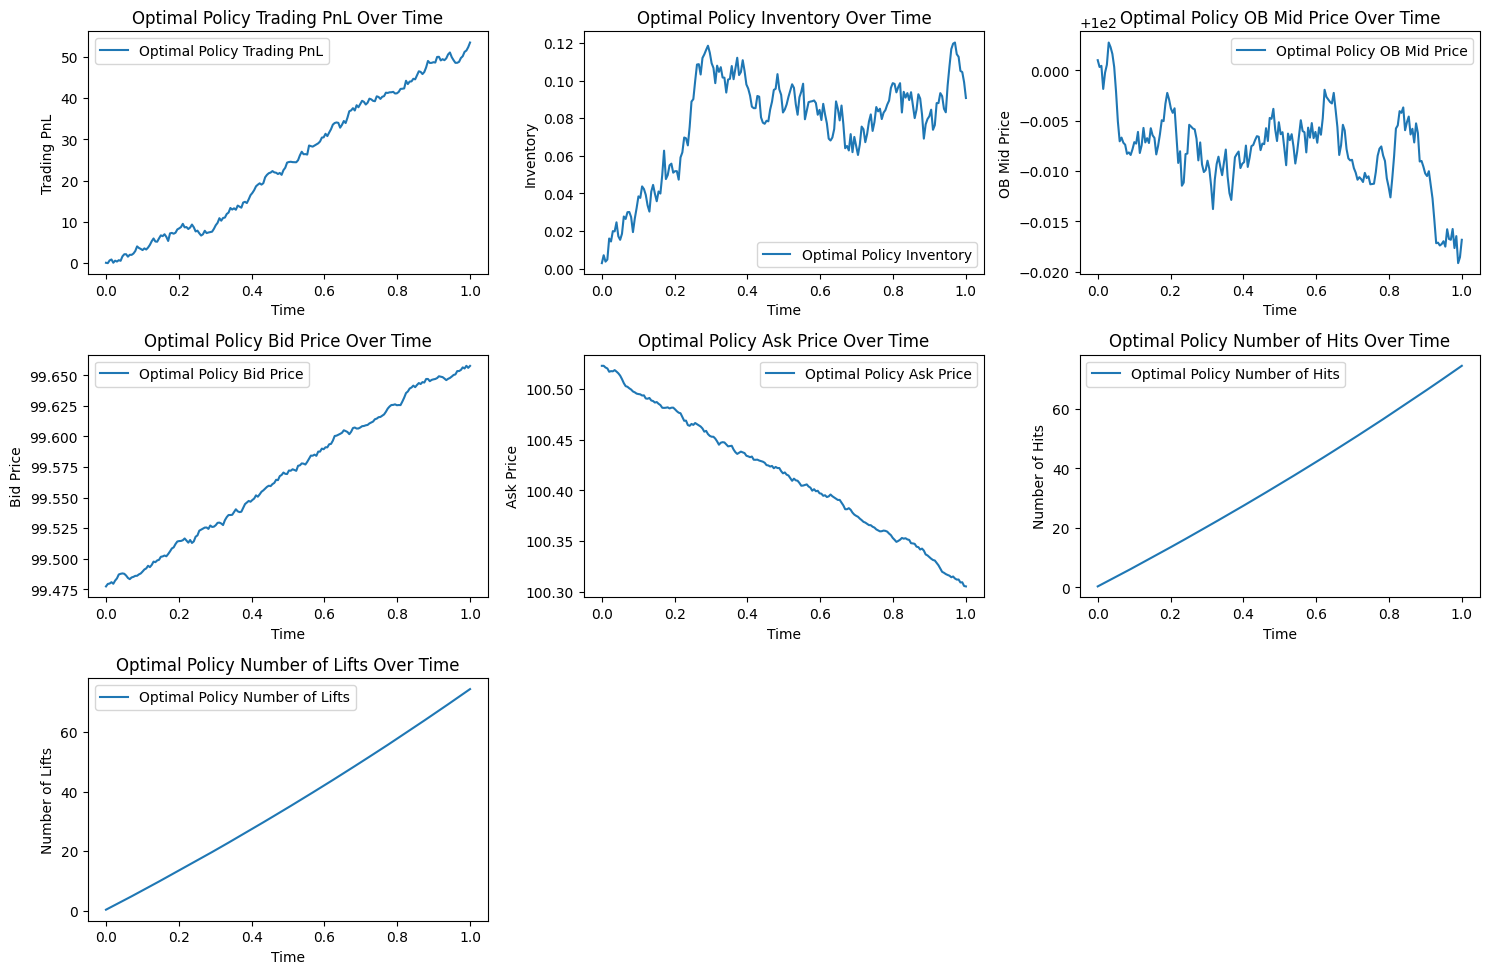

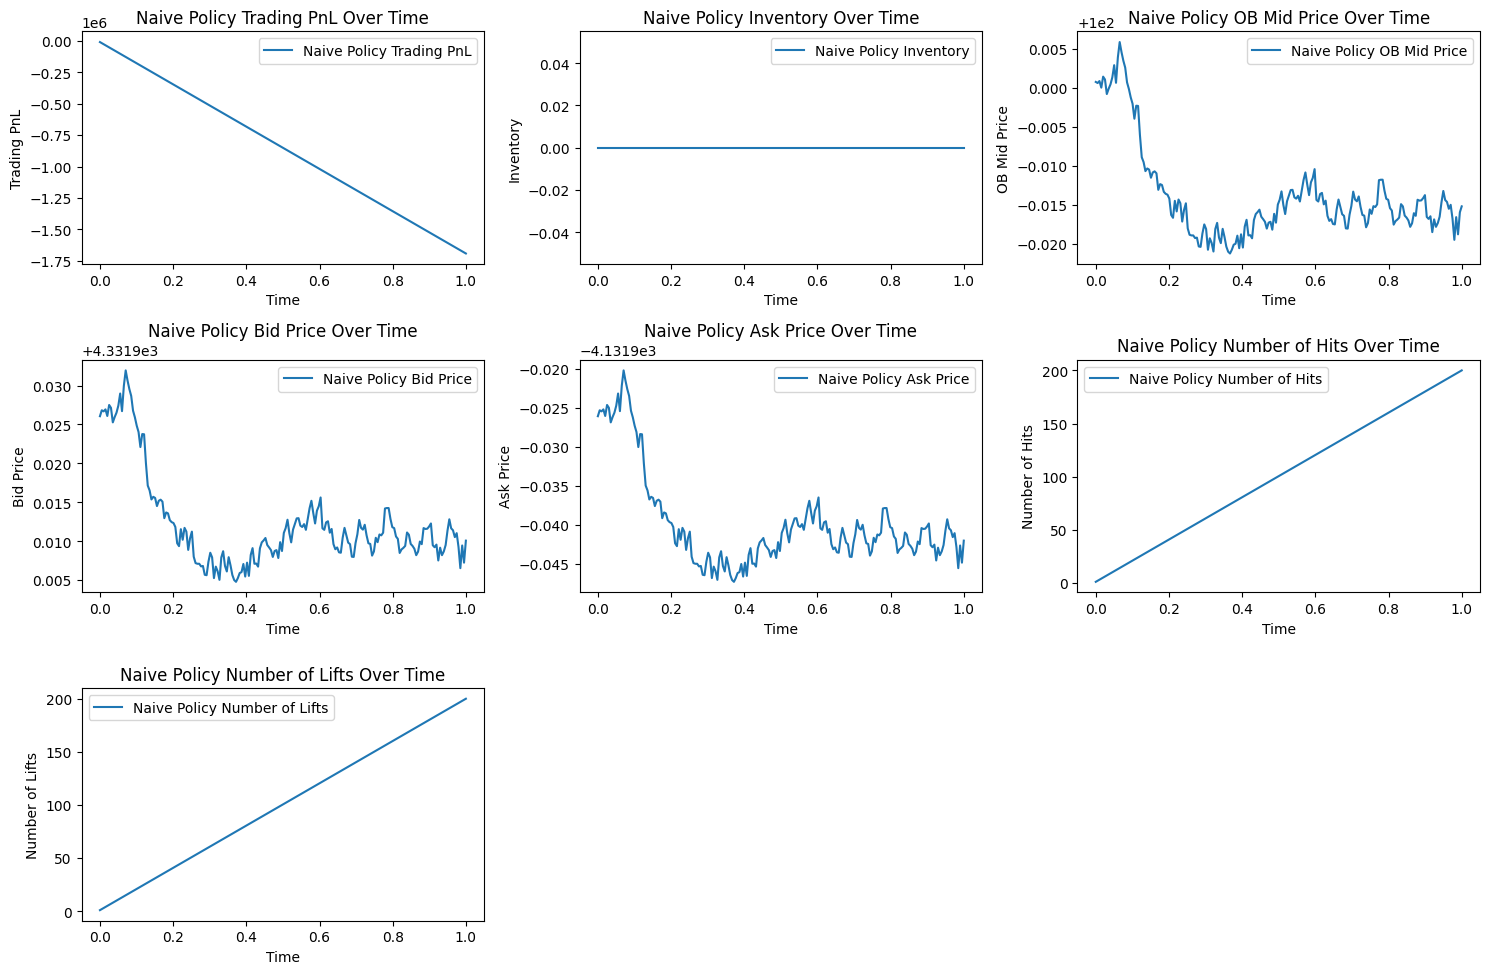

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100
T = 1
delta_t = 0.005
gamma = 0.1
sigma = 2
I0 = 0
k = 1.5
c = 140
num_simulations = 10000
num_steps = int(T / delta_t)


def optimal_spread(t):
    return gamma * sigma ** 2 * (T - t) + (1 / gamma) * np.log(1 + gamma / k)


def simulate_policy(policy_type, constant_spread=None):
    PnL = 0
    I = I0
    S = S0
    hits = 0
    lifts = 0
    metrics = np.zeros((num_steps, 7))  # PnL, Inventory, Mid Price, Bid, Ask, Hits, Lifts

    for step in range(num_steps):
        if policy_type == 'optimal':
            spread = optimal_spread(step * delta_t)
        else:
            spread = constant_spread

        P_ask = S + spread / 2
        P_bid = S - spread / 2

        if np.random.rand() < (c * np.exp(-k * (P_ask - S)) * delta_t):
            PnL += P_ask
            I -= 1
            lifts += 1

        if np.random.rand() < (c * np.exp(-k * (S - P_bid)) * delta_t):
            PnL -= P_bid
            I += 1
            hits += 1

        # Random walk for the mid price
        S += sigma * np.sqrt(delta_t) * np.random.choice([-1, 1])

        metrics[step] = [PnL, I, S, P_bid, P_ask, hits, lifts]

    return metrics

optimal_policy_avg_metrics = np.zeros((num_steps, 7))
naive_policy_avg_metrics = np.zeros((num_steps, 7))


for _ in range(num_simulations):
    optimal_policy_avg_metrics += simulate_policy('optimal')


average_optimal_spread = np.mean(optimal_policy_avg_metrics[:, 3] - optimal_policy_avg_metrics[:, 4])


for _ in range(num_simulations):
    naive_policy_avg_metrics += simulate_policy('naive', constant_spread=average_optimal_spread)

optimal_policy_avg_metrics /= num_simulations
naive_policy_avg_metrics /= num_simulations


def plot_policy_metrics(policy_metrics, policy_name):
    plt.figure(figsize=(15, 10))
    titles = ['Trading PnL', 'Inventory', 'OB Mid Price', 'Bid Price', 'Ask Price', 'Number of Hits', 'Number of Lifts']
    time = np.linspace(0, T, num_steps)

    for i in range(7):
        plt.subplot(3, 3, i+1)
        plt.plot(time, policy_metrics[:, i], label=f'{policy_name} {titles[i]}')
        plt.xlabel('Time')
        plt.ylabel(titles[i])
        plt.title(f'{policy_name} {titles[i]} Over Time')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the metrics for the Optimal Policy
plot_policy_metrics(optimal_policy_avg_metrics, 'Optimal Policy')

# Plot the metrics for the Naive Policy
plot_policy_metrics(naive_policy_avg_metrics, 'Naive Policy')

## Question 3
Although the provided code contains a number of utilties for Monte-Carlo
prediction, you may consider writing re-writing these functions to
improve your understanding.

1.  We have written the function `mc_prediction` in
    [rl/monte_carlo.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/monte_carlo.py)
    as an implementation of Monte-Carlo Prediction with function
    approximation. You have also learnt that since Tabular MC Prediction
    is a special case of MC Prediction with Function Approximation and
    so, writing a separate function for Tabular MC Prediction is not
    necessary. But for a learning experience, it's a great idea to write
    a function for Tabular MC Prediction **from scratch**. Think about
    what the input and output types must be. Be sure to reduce the
    learning rate appropriately as a function of number of updates (or
    as a function of number of episodes).

2.  We have written the function `td_prediction` in
    [rl/td.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/td.py)
    as an implementation of Temporal-Difference Prediction with function
    approximation. You have also learnt that since Tabular TD Prediction
    is a special case of TD Prediction with Function Approximation and
    so, writing a separate function for Tabular TD Prediction is not
    necessary. But for a learning experience, it's a great idea to write
    a function for Tabular TD Prediction **from scratch**. Think about
    what the input and output types must be. Be sure to reduce the
    learning rate appropriately as a function of number of updates.

3.  Test your above implementations of Tabular MC Prediction and Tabular
    TD Prediction on\
    `SimpleInventoryMRPFinite` (from
    [rl/chapter2/simple_inventory_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter2/simple_inventory_mrp.py))
    by ensuring that your Value Function output matches that produced by
    the function approximation versions of MC Prediction and TD
    Prediction.

In [178]:
from typing import Sequence, Iterable, Callable, Mapping
from dataclasses import dataclass, replace, field
import itertools
from rl.function_approx import AdamGradient
from rl.function_approx import LinearFunctionApprox
from rl.approximate_dynamic_programming import ValueFunctionApprox
from rl.distribution import Choose
from rl.markov_decision_process import NonTerminal
from rl.chapter2.simple_inventory_mrp import SimpleInventoryMRPFinite
from rl.chapter2.simple_inventory_mrp import InventoryState
from rl.chapter10.prediction_utils import (
    mc_prediction_learning_rate,
    td_prediction_learning_rate
)
from rl.returns import returns
import numpy as np
from itertools import islice
from matplotlib import pyplot as plt

In [33]:
user_capacity = 2
user_poisson_lambda = 1.0
user_holding_cost = 1.0
user_stockout_cost = 10.0

gamma = 0.9

si_mrp = SimpleInventoryMRPFinite(
    capacity=user_capacity,
    poisson_lambda=user_poisson_lambda,
    holding_cost=user_holding_cost,
    stockout_cost=user_stockout_cost
)

nt_states: Sequence[NonTerminal[InventoryState]] = si_mrp.non_terminal_states
true_vf: np.ndarray = si_mrp.get_value_function_vec(gamma=gamma)

mc_episode_length_tol: float = 1e-6
num_episodes = 10000

td_episode_length: int = 100
initial_learning_rate: float = 0.03
half_life: float = 1000.0
exponent: float = 0.5

In [188]:
ffs: Sequence[Callable[[NonTerminal[InventoryState]], float]] = \
    [(lambda x, s=s: float(x.state == s.state)) for s in nt_states]

mc_ag: AdamGradient = AdamGradient(
    learning_rate=0.05,
    decay1=0.9,
    decay2=0.999
)

td_ag: AdamGradient = AdamGradient(
    learning_rate=0.003,
    decay1=0.9,
    decay2=0.999
)

mc_func_approx: LinearFunctionApprox[NonTerminal[InventoryState]] = \
    LinearFunctionApprox.create(
        feature_functions=ffs,
        adam_gradient=mc_ag
    )

td_func_approx: LinearFunctionApprox[NonTerminal[InventoryState]] = \
    LinearFunctionApprox.create(
        feature_functions=ffs,
        adam_gradient=td_ag
    )

it_mc: Iterable[ValueFunctionApprox[InventoryState]] = \
    mc_prediction_learning_rate(
        mrp=si_mrp,
        start_state_distribution=Choose(nt_states),
        gamma=gamma,
        episode_length_tolerance=mc_episode_length_tol,
        initial_func_approx=mc_func_approx
    )

it_td: Iterable[ValueFunctionApprox[InventoryState]] = \
    td_prediction_learning_rate(
        mrp=si_mrp,
        start_state_distribution=Choose(nt_states),
        gamma=gamma,
        episode_length=td_episode_length,
        initial_func_approx=td_func_approx
    )

rmse_mc_default = []
mc_episodes: int = 3000
for i, mc_vf in enumerate(islice(it_mc, mc_episodes)):
    mc_rmse: float = np.sqrt(sum(
        (mc_vf(s) - true_vf[i]) ** 2 for i, s in enumerate(nt_states)
    ) / len(nt_states))
    rmse_mc_default.append(mc_rmse)
    if i % 300 == 0:
        print(f"MC: Iteration = {i:d}, RMSE = {mc_rmse:.3f}")

rmse_td_default = []
td_experiences: int = 300000
for i, td_vf in enumerate(islice(it_td, td_experiences)):
    td_rmse: float = np.sqrt(sum(
        (td_vf(s) - true_vf[i]) ** 2 for i, s in enumerate(nt_states)
    ) / len(nt_states))
    rmse_td_default.append(td_rmse)
    if i % 30000 == 0:
        print(f"TD: Iteration = {i:d}, RMSE = {td_rmse:.3f}")


MC: Iteration = 0, RMSE = 39.307
MC: Iteration = 300, RMSE = 0.770
MC: Iteration = 600, RMSE = 1.141
MC: Iteration = 900, RMSE = 0.804
MC: Iteration = 1200, RMSE = 0.718
MC: Iteration = 1500, RMSE = 0.980
MC: Iteration = 1800, RMSE = 0.732
MC: Iteration = 2100, RMSE = 0.674
MC: Iteration = 2400, RMSE = 0.404
MC: Iteration = 2700, RMSE = 0.628
TD: Iteration = 0, RMSE = 39.307
TD: Iteration = 30000, RMSE = 15.031
TD: Iteration = 60000, RMSE = 4.565
TD: Iteration = 90000, RMSE = 1.337
TD: Iteration = 120000, RMSE = 0.450
TD: Iteration = 150000, RMSE = 0.195
TD: Iteration = 180000, RMSE = 0.432
TD: Iteration = 210000, RMSE = 0.258
TD: Iteration = 240000, RMSE = 0.299
TD: Iteration = 270000, RMSE = 0.265


In [197]:
class TabularMC:

    def __init__(self, nt_states, init_value = 0):
        self.values_map = {state: init_value for state in nt_states}
        self.counts_map = {state: 0 for state in nt_states}
        self.nt_states = nt_states
    
    def update(self, episodes, gamma, iters, true_vf):
        rmse = []
        for episode in itertools.islice(episodes, iters):
            for step in episode:
                self.counts_map[step.state] += 1
                alpha = 1 / self.counts_map[step.state]
                self.values_map[step.state] *= 1 - alpha
                self.values_map[step.state] += alpha * step.return_
            rmse.append(np.sqrt(sum((self.values_map[s] - true_vf[i]) ** 2 for i, s in enumerate(self.nt_states))) / len(nt_states))
        return rmse
    
    def generate_episodes(self, mrp):
        traces = mrp.reward_traces(Choose(mrp.non_terminal_states))
        episodes = (returns(trace, gamma, 1e-6) for trace in traces)
        return episodes


class TabularTD:

    def __init__(self, nt_states, init_value = 0):
        self.nt_states = nt_states
        self.values_map = {state: init_value for state in nt_states}
        self.counts_map = {state: 0 for state in nt_states}
    
    def update(self, transitions, gamma, iters, true_vf):
        rmse = []
        for transition in itertools.islice(transitions, iters):
            self.counts_map[transition.state] += 1
            alpha = 1 / (self.counts_map[transition.state] // 10 + 1)
            self.values_map[transition.state] *= 1 - alpha
            self.values_map[transition.state] += alpha * (transition.reward + gamma * self.values_map[transition.next_state])
            rmse.append(np.sqrt(sum((self.values_map[s] - true_vf[i]) ** 2 for i, s in enumerate(self.nt_states))) / len(nt_states))
        return rmse


    def generate_transitions(self, mrp):
        episodes = mrp.reward_traces(Choose(mrp.non_terminal_states))
        return itertools.chain.from_iterable(
        itertools.islice(episode, 100) for episode in episodes
    )

In [198]:
mc_tab = TabularMC(nt_states)
episodes = mc_tab.generate_episodes(si_mrp)
rmse_mc_tab = mc_tab.update(episodes, gamma, 3000, true_vf)

In [199]:
td_tab = TabularTD(nt_states)
episodes = td_tab.generate_transitions(si_mrp)
rmse_td_tab = td_tab.update(episodes, gamma, 300000, true_vf)

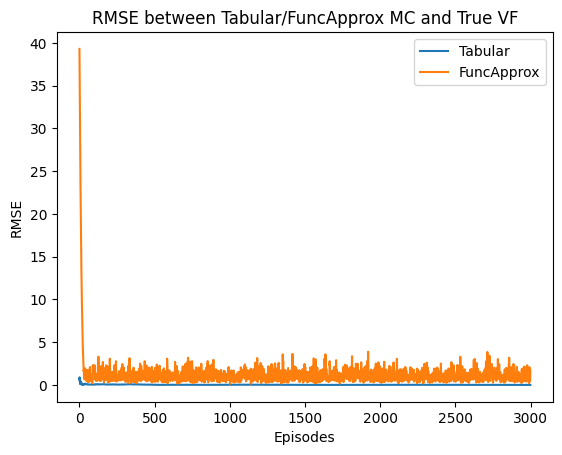

In [205]:
plt.plot(rmse_mc_tab, label = "Tabular")
plt.plot(rmse_mc_default, label = "FuncApprox")
plt.title("RMSE between Tabular/FuncApprox MC and True VF")
plt.xlabel("Episodes")
plt.ylabel("RMSE")
plt.legend()

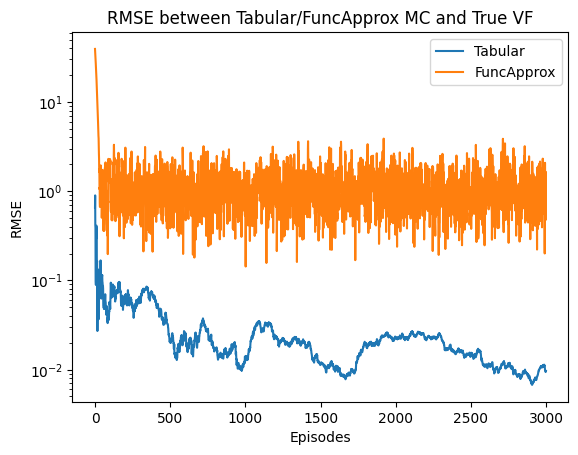

In [ ]:
plt.semilogy(rmse_mc_tab, label = "Tabular")
plt.semilogy(rmse_mc_default, label = "FuncApprox")
plt.title("RMSE between Tabular/FuncApprox MC and True VF")
plt.xlabel("Episodes")
plt.ylabel("RMSE")
plt.legend()

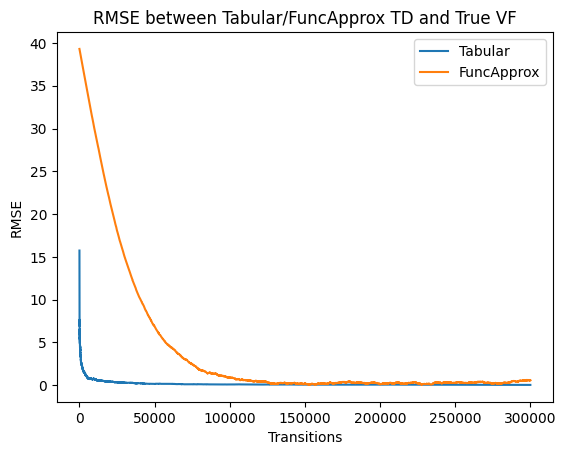

In [210]:
plt.plot(rmse_td_tab, label = "Tabular")
plt.plot(rmse_td_default, label = "FuncApprox")
plt.title("RMSE between Tabular/FuncApprox TD and True VF")
plt.xlabel("Transitions")
plt.ylabel("RMSE")
plt.legend()

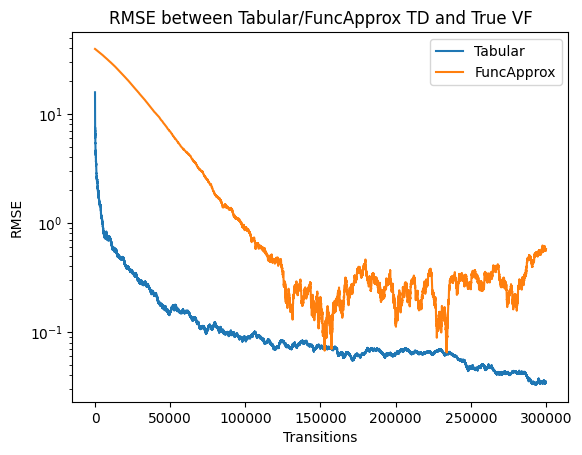

In [211]:
plt.semilogy(rmse_td_tab, label = "Tabular")
plt.semilogy(rmse_td_default, label = "FuncApprox")
plt.title("RMSE between Tabular/FuncApprox TD and True VF")
plt.xlabel("Transitions")
plt.ylabel("RMSE")
plt.legend()